In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/ann_logistic_extra/ecommerce_data.csv

--2023-01-24 18:59:30--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/ann_logistic_extra/ecommerce_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12381 (12K) [text/plain]
Saving to: ‘ecommerce_data.csv’

ecommerce_data.csv  100%[===================>]  12.09K  --.-KB/s    in 0s      

2023-01-24 18:59:30 (40.9 MB/s) - ‘ecommerce_data.csv’ saved [12381/12381]



In [3]:
df = pd.read_csv("ecommerce_data.csv")

In [4]:
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


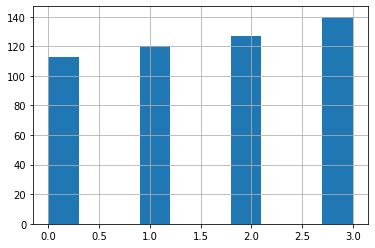

In [5]:
df['time_of_day'].hist();

In [6]:
data = df.to_numpy()
np.random.shuffle(data)

In [7]:
X = data[:, :-1]
Y = data[:, -1].astype(np.int32)

In [8]:
N, D = X.shape
X2 = np.zeros((N, D+3))
X2[:, :(D-1)] = X[:, :(D-1)]

In [9]:
for n in range(N):
  t = int(X[n, (D - 1)])
  X2[t + (D - 1)] = 1

In [10]:
X = X2

In [11]:
Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

In [12]:
# normalize columns 1 and 2
for i in (1, 2):
  m = Xtrain[:, i].mean()
  s = Xtrain[:, i].std()
  Xtrain[:, i] = (Xtrain[:, i] - m) / s
  Xtest[:, i] = (Xtest[:, i] - m) / s

In [13]:
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((400, 8), (400,), (100, 8), (100,))

In [14]:
binary_train_data = Ytrain <= 1
binary_test_data = Ytest <= 1
X2train, Y2train, X2test, Y2test = Xtrain[binary_train_data], Ytrain[binary_train_data], Xtest[binary_test_data], Ytest[binary_test_data]

In [15]:
X2train.shape, Y2train.shape, X2test.shape, Y2test.shape

((315, 8), (315,), (83, 8), (83,))

In [42]:
# randomly initialize weights
D = X.shape[1]
W = np.random.randn(D)
b = 0

In [17]:
# make predictions
def sigmoid(a):
  return 1 / (1 + np.exp(-a))

In [18]:
def forward(X, W, b):
  return sigmoid(X.dot(W) + b)

In [19]:
log_reg = forward(X2train, W, b)

In [20]:
log_reg.shape

(315,)

In [21]:
predictions = np.round(log_reg)
predictions

array([0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0.

In [22]:
print(f"Score: {np.mean(Y2train == predictions)}")

Score: 0.473015873015873


In [24]:
def cross_entropy(Y, pY):
  return -np.mean(Y * np.log(pY) + (1 - Y) * np.log(1 - pY))

In [43]:
train_costs = []
test_costs = []
learning_rate = 0.001
epochs = 10000

for i in range(epochs):
  pYtrain = forward(X2train, W, b)
  pYtest = forward(X2test, W, b)

  cost_train = cross_entropy(Y2train, pYtrain)
  cost_test = cross_entropy(Y2test, pYtest)

  train_costs.append(cost_train)
  test_costs.append(cost_test)

  acc_train = np.mean(Y2train == np.round(pYtrain))
  acc_test = np.mean(Y2test == np.round(pYtest))

  W -= learning_rate * X2train.T.dot(pYtrain - Y2train)  
  b -= learning_rate * (pYtrain - Y2train).sum()

  if i % 1000 == 0:
    print(f"{i} => {cost_train} train loss and {cost_test} test loss") 
    print(f"{i} => {acc_train} train rate and {acc_test} test rate")             

0 => 0.5548989434300349 train loss and 0.5322368843609547 test loss
0 => 0.7365079365079366 train rate and 0.7469879518072289 test rate
1000 => 0.19998774514314688 train loss and 0.16957990300189482 test loss
1000 => 0.9650793650793651 train rate and 0.9518072289156626 test rate
2000 => 0.19923197946792176 train loss and 0.16578337390309306 test loss
2000 => 0.9650793650793651 train rate and 0.9518072289156626 test rate
3000 => 0.19919071574061803 train loss and 0.1649390731543944 test loss
3000 => 0.9650793650793651 train rate and 0.9518072289156626 test rate
4000 => 0.19918806867634106 train loss and 0.16472925670407015 test loss
4000 => 0.9650793650793651 train rate and 0.9518072289156626 test rate
5000 => 0.1991878924164599 train loss and 0.1646754232638784 test loss
5000 => 0.9650793650793651 train rate and 0.9518072289156626 test rate
6000 => 0.19918788056837333 train loss and 0.16466148776845038 test loss
6000 => 0.9650793650793651 train rate and 0.9518072289156626 test rate
700

In [44]:
acc_train = np.mean(Y2train == np.round(pYtrain))
acc_test = np.mean(Y2test == np.round(pYtest))
print(f"Final train classification rate {acc_train} and test classification rate {acc_test}")

Final train classification rate 0.9650793650793651 and test classification rate 0.9518072289156626


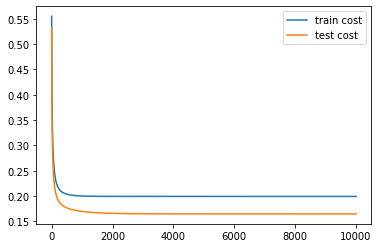

In [45]:
plt.plot(train_costs, label="train cost")
plt.plot(test_costs, label="test cost")
plt.legend();